In [1]:
import sys
sys.path.append('/home/ABTLUS/victor.secco/data_processing') 
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import hyperspy.api as hs
import cv2
from mypackages.edp_processing import ImageAnalysis
import gc

/tmp/ipykernel_303007/399576511.py:16: RuntimeWarning: invalid value encountered in divide
  normalized_images = (all_images-mean_image)/std_dev_image


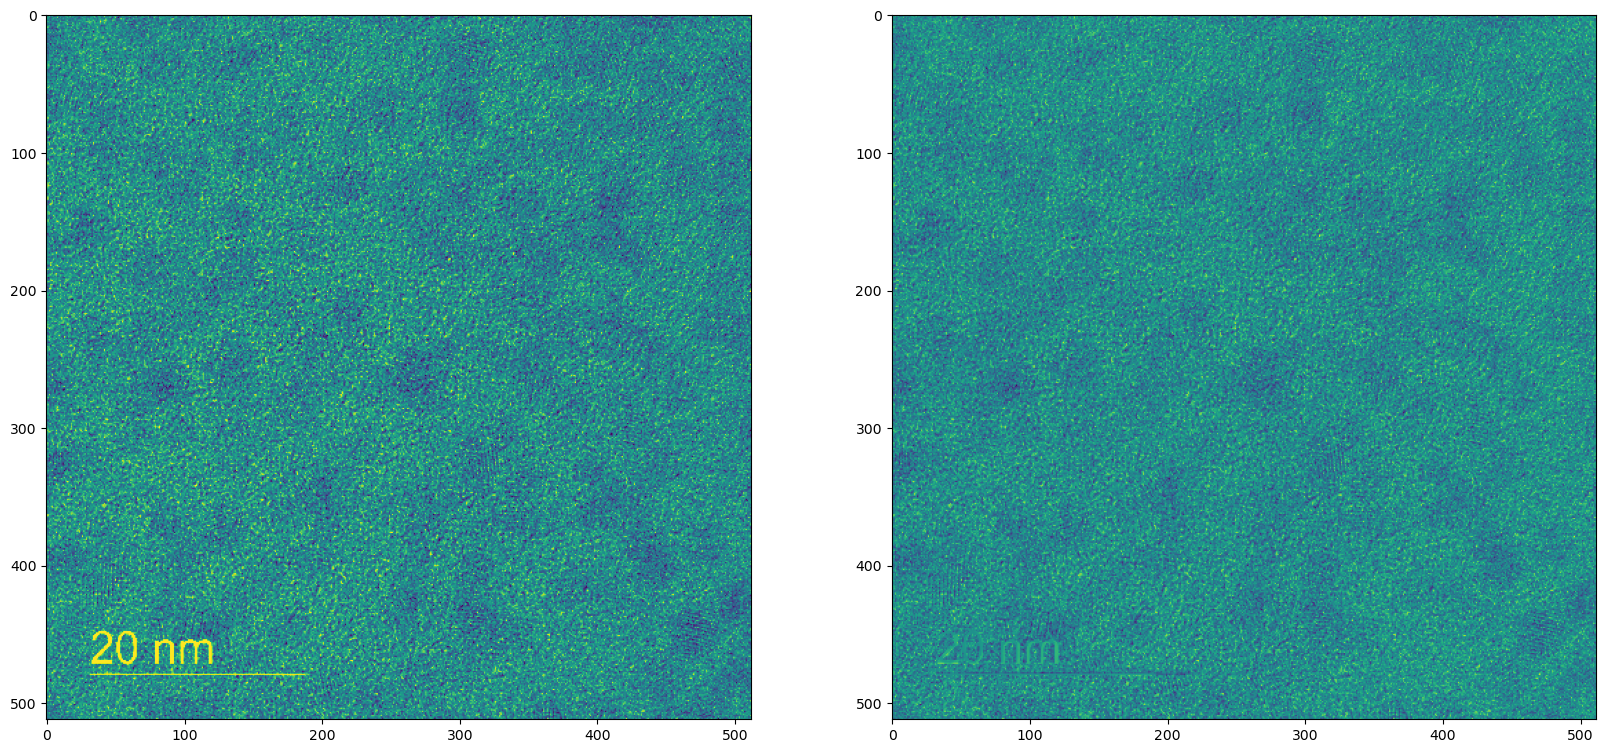

In [2]:
all_images = []
mean_image = []
sd_image = []

directory = '/home/ABTLUS/victor.secco/data_processing/TEM_data/CdSe_PCA'

for image in os.listdir(directory):
    image = Image.open(os.path.join(directory, image))
    resized_image = image.resize((512, 512), Image.BILINEAR)
    resized_image = np.array(resized_image)
    all_images.append(resized_image)
    
all_images = np.array(all_images)    
mean_image = all_images.mean(axis = 0)
std_dev_image = all_images.std(axis = 0)
normalized_images = (all_images-mean_image)/std_dev_image
normalized_images = np.nan_to_num(normalized_images)

f, ax = plt.subplots(1,2 , figsize = (20, 10))
ax[0].imshow(all_images[5])
ax[1].imshow(normalized_images[5])

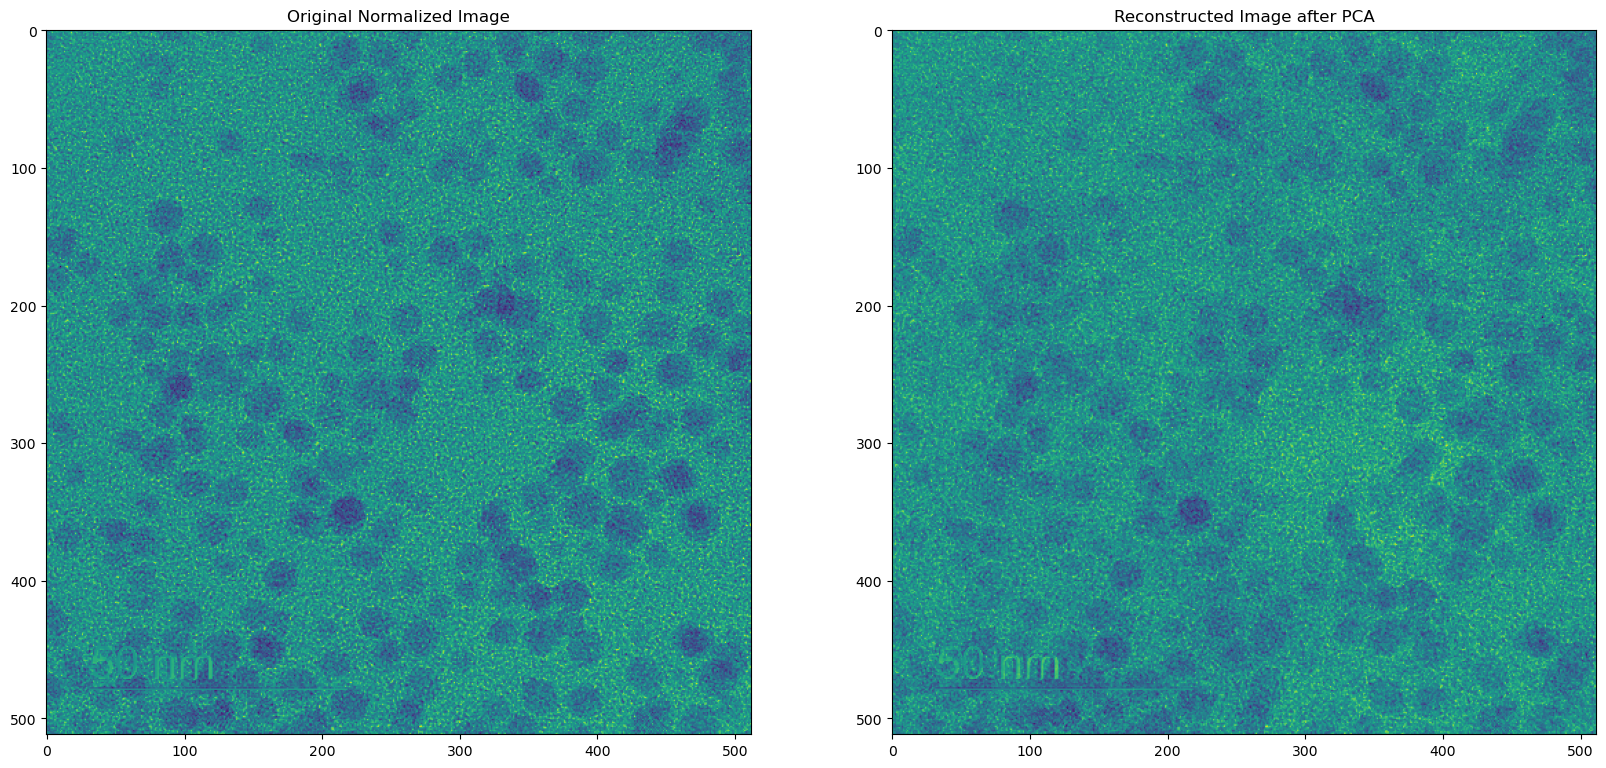

In [4]:
from sklearn.decomposition import PCA
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

# Assuming all_images is your array of normalized images
all_images_flat = normalized_images.reshape(normalized_images.shape[0], -1)  # Flatten each image

# Apply PCA
# Choose the number of components, e.g., 50 for a start. Adjust based on your needs
n_components = 50
pca = PCA(n_components=n_components)
pca_images = pca.fit_transform(all_images_flat)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

n_components_for_reconstruction = 40 
reduced_components = np.zeros_like(pca_images)
reduced_components[:, :n_components_for_reconstruction] = pca_images[:, :n_components_for_reconstruction]

# Inverse transform to reconstruct the images using the reduced number of components
images_reconstructed = pca.inverse_transform(reduced_components)
images_reconstructed = images_reconstructed.reshape(-1, 512, 512)

# Visualization
f, ax = plt.subplots(1, 2, figsize=(20, 10))
# Visualizing one of the original normalized images
ax[0].imshow(normalized_images[0])
ax[0].set_title('Original Normalized Image')
# Visualizing the reconstructed image after PCA
ax[1].imshow(images_reconstructed[0])
ax[1].set_title('Reconstructed Image after PCA')

plt.show()


Text(0, 0.5, 'Explained Variance Ratio')

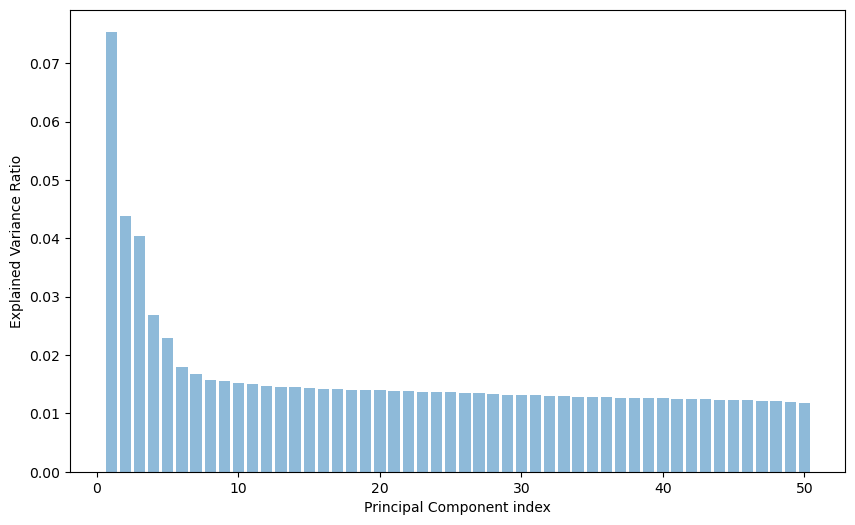

In [7]:
plt.figure(figsize = (10,6))
plt.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, alpha = 0.5, label = 'Individual explained variance')
#plt.step(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance, where='mid', label = 'Cumulative explained variance')

plt.xlabel("Principal Component index")
plt.ylabel('Explained Variance Ratio')